<a href="https://colab.research.google.com/github/ramakanth-rayanchi/CB-DL-01/blob/main/C12_gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implement Gradient Descent For Neural Network (or Logistic Regression)
### Predicting if a person would buy life insurnace based on his age using logistic regression

Above is a binary logistic regression problem as there are only two possible outcomes (i.e. if person buys insurance or he/she doesn't).

In [24]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [25]:
df = pd.read_csv('./drive/MyDrive/Data/CB-lesson-12/insurance_data.csv')
df.head()

,age,affordibility,bought_insurance
0,22,1,0
1,25,0,0
2,47,1,1
3,52,0,0
4,46,1,1


**Split train and test set**

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['age','affordibility']], df['bought_insurance'],test_size=0.2, random_state=25)


Preprocessing: Scale the data so that both age and affordibility are in same scaling range

In [27]:
X_train_scaled = X_train.copy()
X_train_scaled['age'] = X_train_scaled['age']/100

X_test_scaled = X_test.copy()
X_test_scaled['age'] = X_test_scaled['age']/100

Model Building: First build a model in keras/tensorflow and see what weights and bias values it comes up with. We will than try to reproduce same weights and bias in our plain python implementation of gradient descent. Below is the architecture of our simple neural network

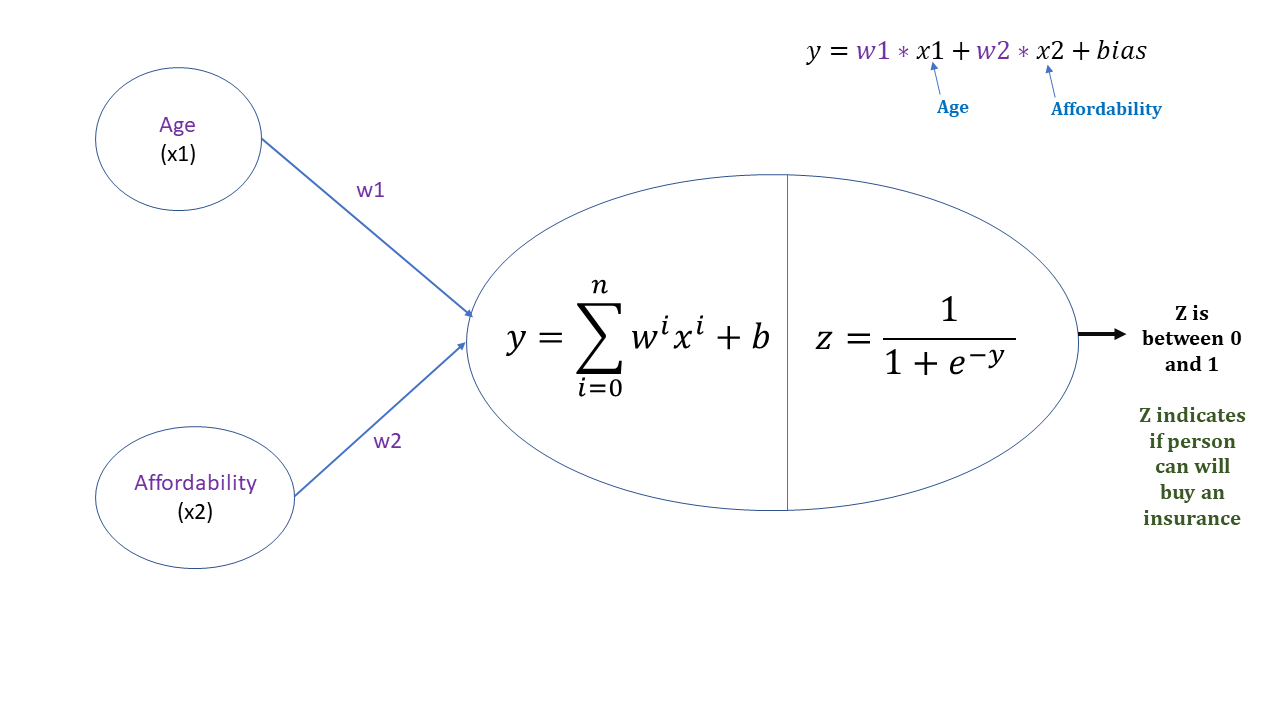

In [5]:
model = keras.Sequential([
    keras.layers.Dense(1,input_shape=(2,),activation='sigmoid', kernel_initializer='ones', bias_initializer='zeros')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy']
              )

model.fit(X_train_scaled, y_train, epochs=5000)

Streaming output truncated to the last 5000 lines.
Epoch 2441/5000
1/1 [==============================] - 0s 11ms/step - loss: 0.5345 - accuracy: 0.7273
Epoch 2442/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.5344 - accuracy: 0.7273
Epoch 2443/5000
1/1 [==============================] - 0s 9ms/step - loss: 0.5344 - accuracy: 0.7273
Epoch 2444/5000
1/1 [==============================] - 0s 13ms/step - loss: 0.5344 - accuracy: 0.7273
Epoch 2445/5000
1/1 [==============================] - 0s 13ms/step - loss: 0.5343 - accuracy: 0.7273
Epoch 2446/5000
1/1 [==============================] - 0s 14ms/step - loss: 0.5343 - accuracy: 0.7273
Epoch 2447/5000
1/1 [==============================] - 0s 12ms/step - loss: 0.5342 - accuracy: 0.7273
Epoch 2448/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.5342 - accuracy: 0.7273
Epoch 2449/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.5342 - accuracy: 0.7273
Epoch 2450/5000
1/1 [===========

Evaluate the model on test set

In [28]:
model.evaluate(X_test_scaled, y_test)

1/1 [==============================] - 0s 106ms/step - loss: 0.3550 - accuracy: 1.0000


[0.3549776077270508, 1.0]

In [29]:
model.predict(X_test_scaled)

1/1 [==============================] - 0s 84ms/step


array([[0.7054848 ],
       [0.3556957 ],
       [0.16827832],
       [0.47801185],
       [0.7260696 ],
       [0.8294983 ]], dtype=float32)

In [30]:
y_test

2     1
10    0
21    0
11    0
14    1
9     1
Name: bought_insurance, dtype: int64

**Now get the value of weights and bias from the model**

In [31]:
coef, intercept = model.weights

In [32]:
coef, intercept

(<tf.Variable 'dense/kernel:0' shape=(2, 1) dtype=float32, numpy=
 array([[5.060863 ],
        [1.4086521]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([-2.913703], dtype=float32)>)

**This means w1=5.060863, w2= 1.4086521, bias = -2.913703**

In [33]:
def sigmoid(x):
  import math
  return 1/(1+math.exp(-x))

sigmoid(18)

0.9999999847700205

In [34]:
X_test

,age,affordibility
2,47,1
10,18,1
21,26,0
11,28,1
14,49,1
9,61,1


**Instead of model.predict, write our own prediction function that uses w1,w2 and bias**

In [35]:
def prediction_function(age, affordability):
  weighted_sum = coef[0]*age + coef[1]*affordability + intercept
  return sigmoid(weighted_sum)

prediction_function(.47, 1)

0.705484819775958

In [36]:
prediction_function(0.18, 1)

0.35569571637887243

**Now we start implementing gradient descent in plain python. Again the goal is to come up with same w1, w2 and bias that keras model calculated. We want to show how keras/tensorflow would have computed these values internally using gradient descent**

**First write couple of helper routines such as sigmoid and log_loss**

In [37]:
def sigmoid_numpy(X):
  return 1/(1+np.exp(-X))

sigmoid_numpy(np.array([12,0,1]))

array([0.99999386, 0.5       , 0.73105858])

In [41]:
def log_loss(y_predicted, y_true):
  epsilon = 1e-15
  y_predicted_new = [max(i, epsilon) for i in y_predicted]
  y_predicted_new = [min(i, 1-epsilon) for i in y_predicted_new]
  y_predicted_new = np.array(y_predicted_new)
  return -np.mean(y_true * np.log(y_predicted_new) + (1-y_true)*np.log(1-y_predicted_new))

**All right now comes the time to implement our final gradient descent function !! yay !!!**

In [44]:
def gradient_descent(age, affordability, y_true, epochs, loss_threshold):
  w1=w2=1
  bias=0
  rate=0.5
  n=len(age)
  for i in range(epochs):
    weighted_sum = w1*age + w2*affordability + bias
    y_predicted = sigmoid_numpy(weighted_sum)
    loss = log_loss(y_predicted, y_true)

    w1d = (1/n)*np.dot(np.transpose(age), (y_predicted-y_true))
    w2d = (1/n)*np.dot(np.transpose(affordability), (y_predicted-y_true))
    bias_d = np.mean(y_predicted-y_true)

    w1 = w1-w1d*rate
    w2 = w2-w2d*rate
    bias = bias-bias_d*rate

    print(f'Epoch:{i}, w1:{w1}, w2:{w2}, bias:{bias}, loss:{loss}')

    if loss <= loss_threshold:
      break

  return w1,w2,bias

In [45]:
gradient_descent(X_train_scaled['age'], X_train_scaled['affordibility'], y_train, 1000, 0.4631)

Epoch:0, w1:0.974907633470177, w2:0.948348125394529, bias:-0.11341867736368583, loss:0.7113403233723417
Epoch:1, w1:0.9556229728273669, w2:0.9058873696677865, bias:-0.2122349122718517, loss:0.681264778737757
Epoch:2, w1:0.9416488476693794, w2:0.8719790823960313, bias:-0.2977578997796538, loss:0.6591474252715025
Epoch:3, w1:0.9323916996249162, w2:0.8457541517722915, bias:-0.3715094724003511, loss:0.6431523291301917
Epoch:4, w1:0.9272267472726993, w2:0.8262362885332687, bias:-0.43506643026891584, loss:0.6316873063379158
Epoch:5, w1:0.9255469396815343, w2:0.8124402814952774, bias:-0.48994490058938817, loss:0.623471707997592
Epoch:6, w1:0.9267936114129968, w2:0.8034375029757677, bias:-0.5375299543522853, loss:0.6175321183044205
Epoch:7, w1:0.93047170420295, w2:0.7983920007454487, bias:-0.5790424270894963, loss:0.6131591858705934
Epoch:8, w1:0.9361540784567942, w2:0.7965748796787705, bias:-0.6155315088627655, loss:0.6098518179750948
Epoch:9, w1:0.9434791243557357, w2:0.7973647616854131, bia

(5.051047623653049, 1.4569794548473887, -2.9596534546250037)

In [46]:
coef, intercept

(<tf.Variable 'dense/kernel:0' shape=(2, 1) dtype=float32, numpy=
 array([[5.060863 ],
        [1.4086521]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([-2.913703], dtype=float32)>)

**This shows that in the end we were able to come up with same value of w1,w2 and bias using a plain python implementation of gradient descent function**